## Step 1: Import Required Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Suppress unnecessary TensorFlow logging messages

In [9]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Step 2: Define Helper Function to Plot Model Training History

In [10]:
def plot_model_history(model_history):
    """
    Function to plot Accuracy and Loss curves given the model history
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    axs[0].plot(model_history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(model_history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='best')
    
    # Plot loss
    axs[1].plot(model_history.history['loss'], label='Train Loss')
    axs[1].plot(model_history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='best')
    
    plt.show()

## Step 3: Set Dataset Paths and Training Parameters

In [11]:
train_dir = 'data/train'  # Path to training dataset
val_dir = 'data/test'     # Path to validation dataset

num_train = 28709  # Number of training samples
num_val = 7178     # Number of validation samples
batch_size = 64
num_epoch = 75

## Step 4: Load and Preprocess Data Using ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Step 5: Build the CNN Model and Train the Model

In [13]:
# Build the CNN model
model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax'),
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model_info = model.fit(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val // batch_size)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 399s 885ms/step - accuracy: 0.2433 - loss: 1.8305 - val_accuracy: 0.3384 - val_loss: 1.7117
Epoch 2/75
  1/448 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - accuracy: 0.2656 - loss: 1.8210

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2656 - loss: 1.8210 - val_accuracy: 0.3379 - val_loss: 1.7147
Epoch 3/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 259s 579ms/step - accuracy: 0.3367 - loss: 1.6705 - val_accuracy: 0.4067 - val_loss: 1.5499
Epoch 4/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4844 - loss: 1.4523 - val_accuracy: 0.4082 - val_loss: 1.5481
Epoch 5/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4004 - loss: 1.5519 - val_accuracy: 0.4258 - val_loss: 1.4853
Epoch 6/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4375 - loss: 1.4736 - val_accuracy: 0.4255 - val_loss: 1.4873
Epoch 7/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.4338 - loss: 1.4801 - val_accuracy: 0.4605 - val_loss: 1.4223
Epoch 8/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4219 - loss: 1.4846 - val_accuracy: 0.4605 - val_loss: 1.4205
Epoch 9/75
448/448 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.4578 - loss: 1.4267 - val_accurac

In [14]:
model.save('model.h5')

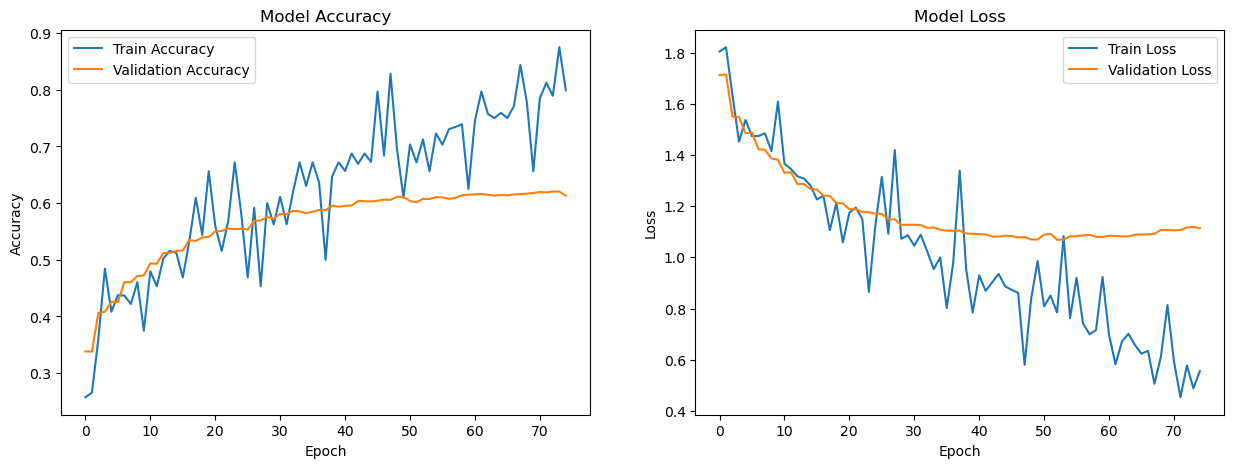

In [15]:
# Plot training history
plot_model_history(model_info)

## Step 7: Load Model and Start Real-time Emotion Detection

In [16]:
# Load trained model weights
model.load_weights('model.h5')

# Define emotion labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Initialize webcam feed
cap = cv2.VideoCapture(0)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Load Haar cascade for face detection
    #face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        
        # Predict emotion
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        
        # Display detected emotion
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('Emotion Recognition', cv2.resize(frame, (1600, 960), interpolation=cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━